In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/content/delivery_time.csv')

In [5]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.shape

(21, 2)

In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
Y= df["Delivery Time"]
X = df["Sorting Time"]

In [11]:
print(Y.shape)
print(X.shape)

(21,)
(21,)


In [12]:
Y= df[["Delivery Time"]]
X = df[["Sorting Time"]]

In [13]:
print(Y.shape)
print(X.shape)

(21, 1)
(21, 1)


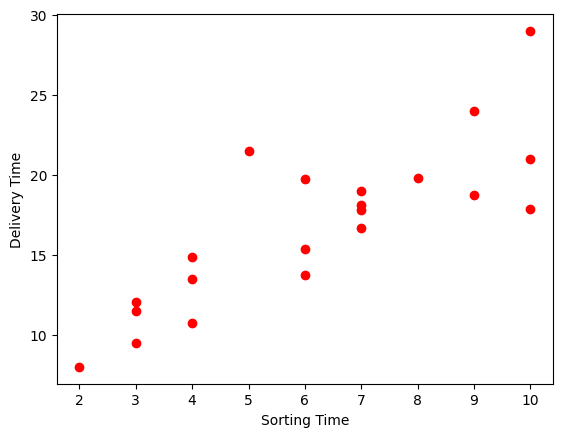

In [14]:
import matplotlib.pyplot as plt
plt.scatter (X.iloc[:,0],Y,color = 'red')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

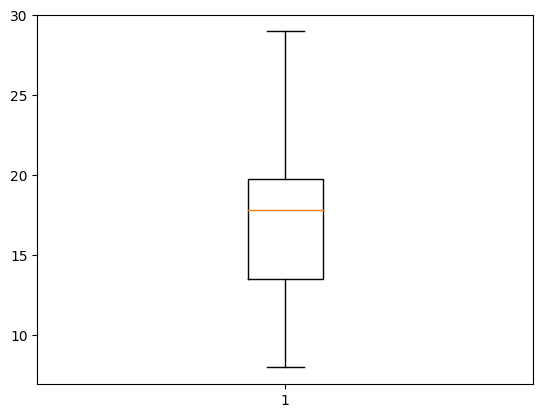

In [15]:
plt.boxplot(df["Delivery Time"])
plt.show()

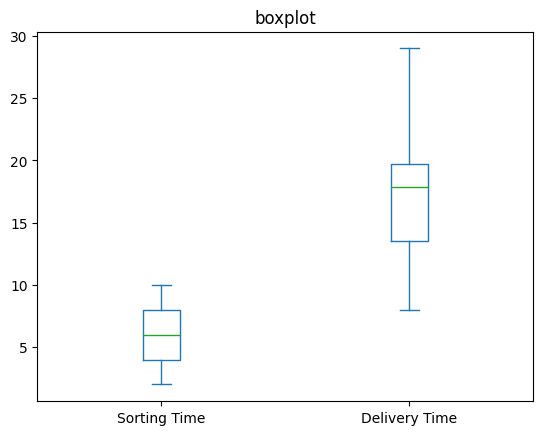

In [16]:
df[['Sorting Time', 'Delivery Time']].plot(kind='box', title='boxplot')
plt.show()

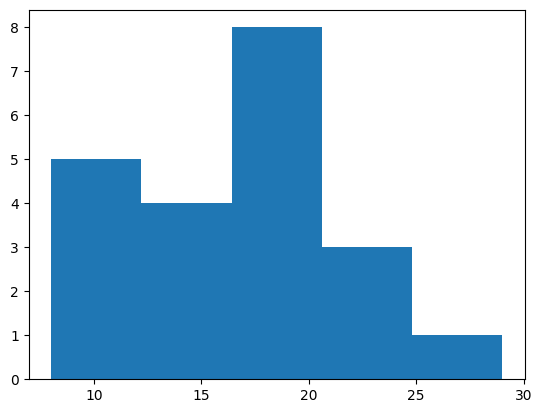

In [17]:
#df[['Sorting Time', 'Delivery Time']].plot(kind='hist', title='histogram')
#plt.show()
plt.hist(df["Delivery Time"],bins=5)
plt.show()

In [18]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
regressor.intercept_

array([4.68229796])

In [22]:
print(regressor.coef_[0])

[2.02424455]


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

ValueError: ignored

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

    Actual  Predicted
0    1.000   0.693812
17   0.625   0.558262
15   0.250   0.406765
1    0.250   0.342039
8    1.000   0.548413


In [29]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print("Root mean square error: ", RMSE.round(3))
print("Rsquare: ", r2_score(y_test, y_pred).round(3)*100)

Root mean square error:  12.166
Rsquare:  -1955.9


In [30]:
print(X)

    Delivery Time
0           21.00
1           13.50
2           19.75
3           24.00
4           29.00
5           15.35
6           19.00
7            9.50
8           17.90
9           18.75
10          19.83
11          10.75
12          16.68
13          11.50
14          12.03
15          14.88
16          13.75
17          18.11
18           8.00
19          17.83
20          21.50


In [31]:
print(y)

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64


In [32]:
import numpy as np

X_new=np.log(X)

In [33]:
X_new

,Delivery Time
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


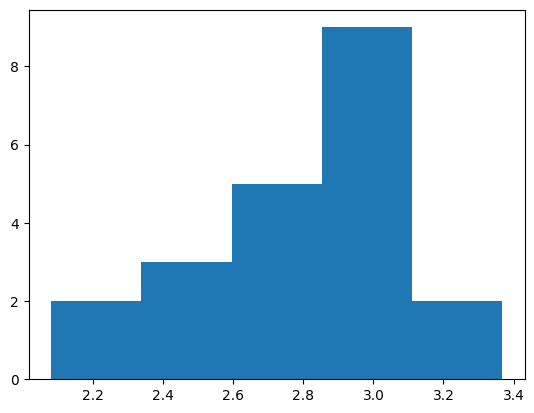

In [34]:
plt.hist(X_new,bins=5)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print("Root mean square error: ", RMSE.round(3))
print("Rsquare: ", r2_score(y_test, y_pred).round(3)*100)

Root mean square error:  1.988
Rsquare:  45.1


In [40]:
X_new1=np.sqrt(X)
X_new1

,Delivery Time
0,4.582576
1,3.674235
2,4.444097
3,4.898979
4,5.385165
5,3.917908
6,4.358899
7,3.082207
8,4.230839
9,4.330127


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size = 0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print("Root mean square error: ", RMSE.round(3))
print("Rsquare: ", r2_score(y_test, y_pred).round(3)*100)

Root mean square error:  2.012
Rsquare:  43.8


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [46]:
type(scaled_data)

numpy.ndarray

In [47]:
scaled_data

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

In [48]:
data = pd.DataFrame(scaled_data)

In [49]:
X1 = data.iloc[:,:-1]
y1 = data.iloc[:,-1]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print("Root mean square error: ", RMSE.round(3))
print("Rsquare: ", r2_score(y_test, y_pred).round(3)*100)

Root mean square error:  5.633
Rsquare:  -28103.199999999997


In [52]:
import scipy as scipy
df['Delivery Time1'] = scipy.stats.zscore(df['Delivery Time'])
print(df.head())

   Delivery Time  Sorting Time  Delivery Time1
0          21.00            10        0.849867
1          13.50             4       -0.664490
2          19.75             6        0.597474
3          24.00             9        1.455610
4          29.00            10        2.465181
